<a href="https://colab.research.google.com/github/rimi22duity/NLP-experiments/blob/main/COVID_19_Related_Analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Paperwork/Coding/A. N. M. Sajedul Alam/COVID Impact/open_one_time_covid_education_impact.csv')

In [21]:
df.head()

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,are_there_children_0_to_2_yrs_out_of_educational_system,were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school,are_there_children_who_stopped_enrolling_in_primary_education,are_there_children_who_stopped_enrolling_in_secondary_education,are_children_attending_face_to_face_classes,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
0,4.570530e+15,3/17/2021,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0,1,1,0,0,1,Every day,Irregularly,0,0,0,1,1,0,0,0,0,0
1,6.440170e+15,3/29/2021,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,0,1,0,0,0,1,No,Irregularly,1,0,1,0,1,1,0,0,0,0
2,5.001170e+15,3/18/2021,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,1,1,1,0,1,No,There are not enough,1,1,1,0,1,0,1,0,0,1
3,5.524930e+15,3/24/2021,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,0,0,0,0,0,1,No,There are enough,1,1,1,0,1,0,0,0,0,0
4,5.032520e+15,3/18/2021,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0,1,0,0,0,1,No,There are not enough,1,0,1,0,1,1,0,0,0,1


In [5]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
#import sklearn.cluster.hierarchical as hclust
from sklearn import preprocessing
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

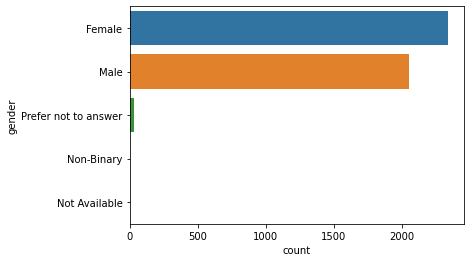

In [22]:
sns.countplot(y="gender", data=df)

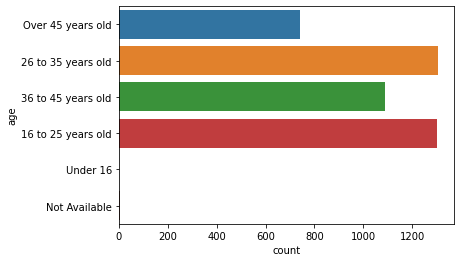

In [23]:
sns.countplot(y="age", data=df)

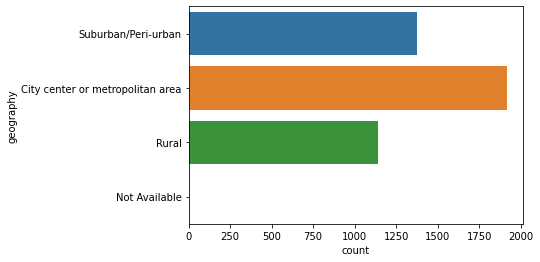

In [24]:
sns.countplot(y="geography", data=df)

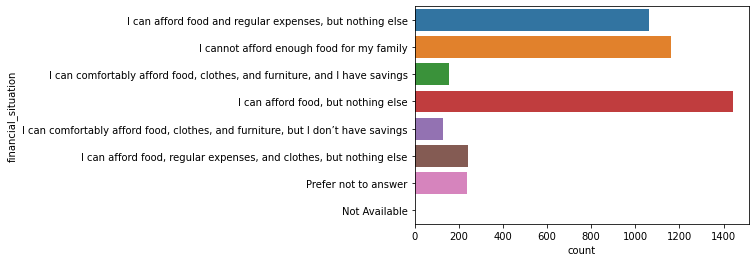

In [25]:
sns.countplot(y="financial_situation", data=df)

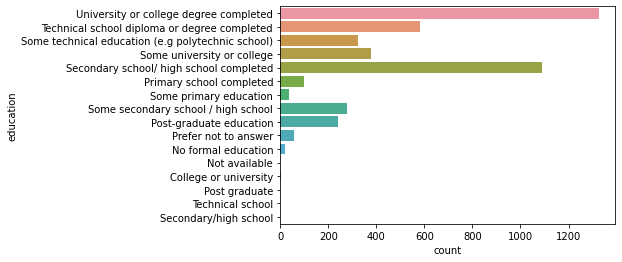

In [26]:
sns.countplot(y="education", data=df)

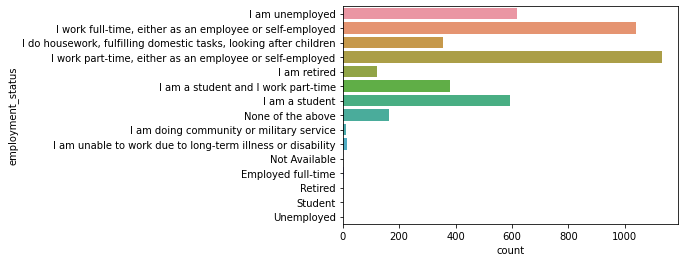

In [27]:
sns.countplot(y="employment_status", data=df)

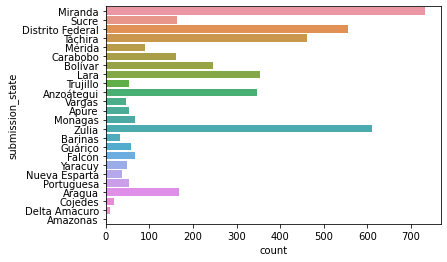

In [28]:
sns.countplot(y="submission_state", data=df)

In [29]:
num_list=['are_there_children_0_to_2_yrs_out_of_educational_system',
       'were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school',
       'are_there_children_who_stopped_enrolling_in_primary_education',
       'are_there_children_who_stopped_enrolling_in_secondary_education',
       'are_children_attending_face_to_face_classes',
       'can_children_observe_deterioration_of_basic_services_of_school',
       'do_children_3_and_17_yrs_receive_regular_school_meals',
       'are_there_teachers_at_scheduled_class_hours',
       'are_children_3_to_17_yrs_dealing_with_irregular_school_activity',
       'are_children_being_teached_by_unqualified_people',
       'did_teachers_leave_the_educational_system',
       'do_school_and_the_teachers_have_internet_connection',
       'do_children_have_internet_connection',
       'do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity',
       'does_home_shows_severe_deficit_of_electricity',
       'does_home_shows_severe_deficit_of_internet',
       'do_children_3_to_17_yrs_miss_class_or_in_lower_grade',
       'are_children_promoted_with_a_modality_different_from_formal_evaluation']

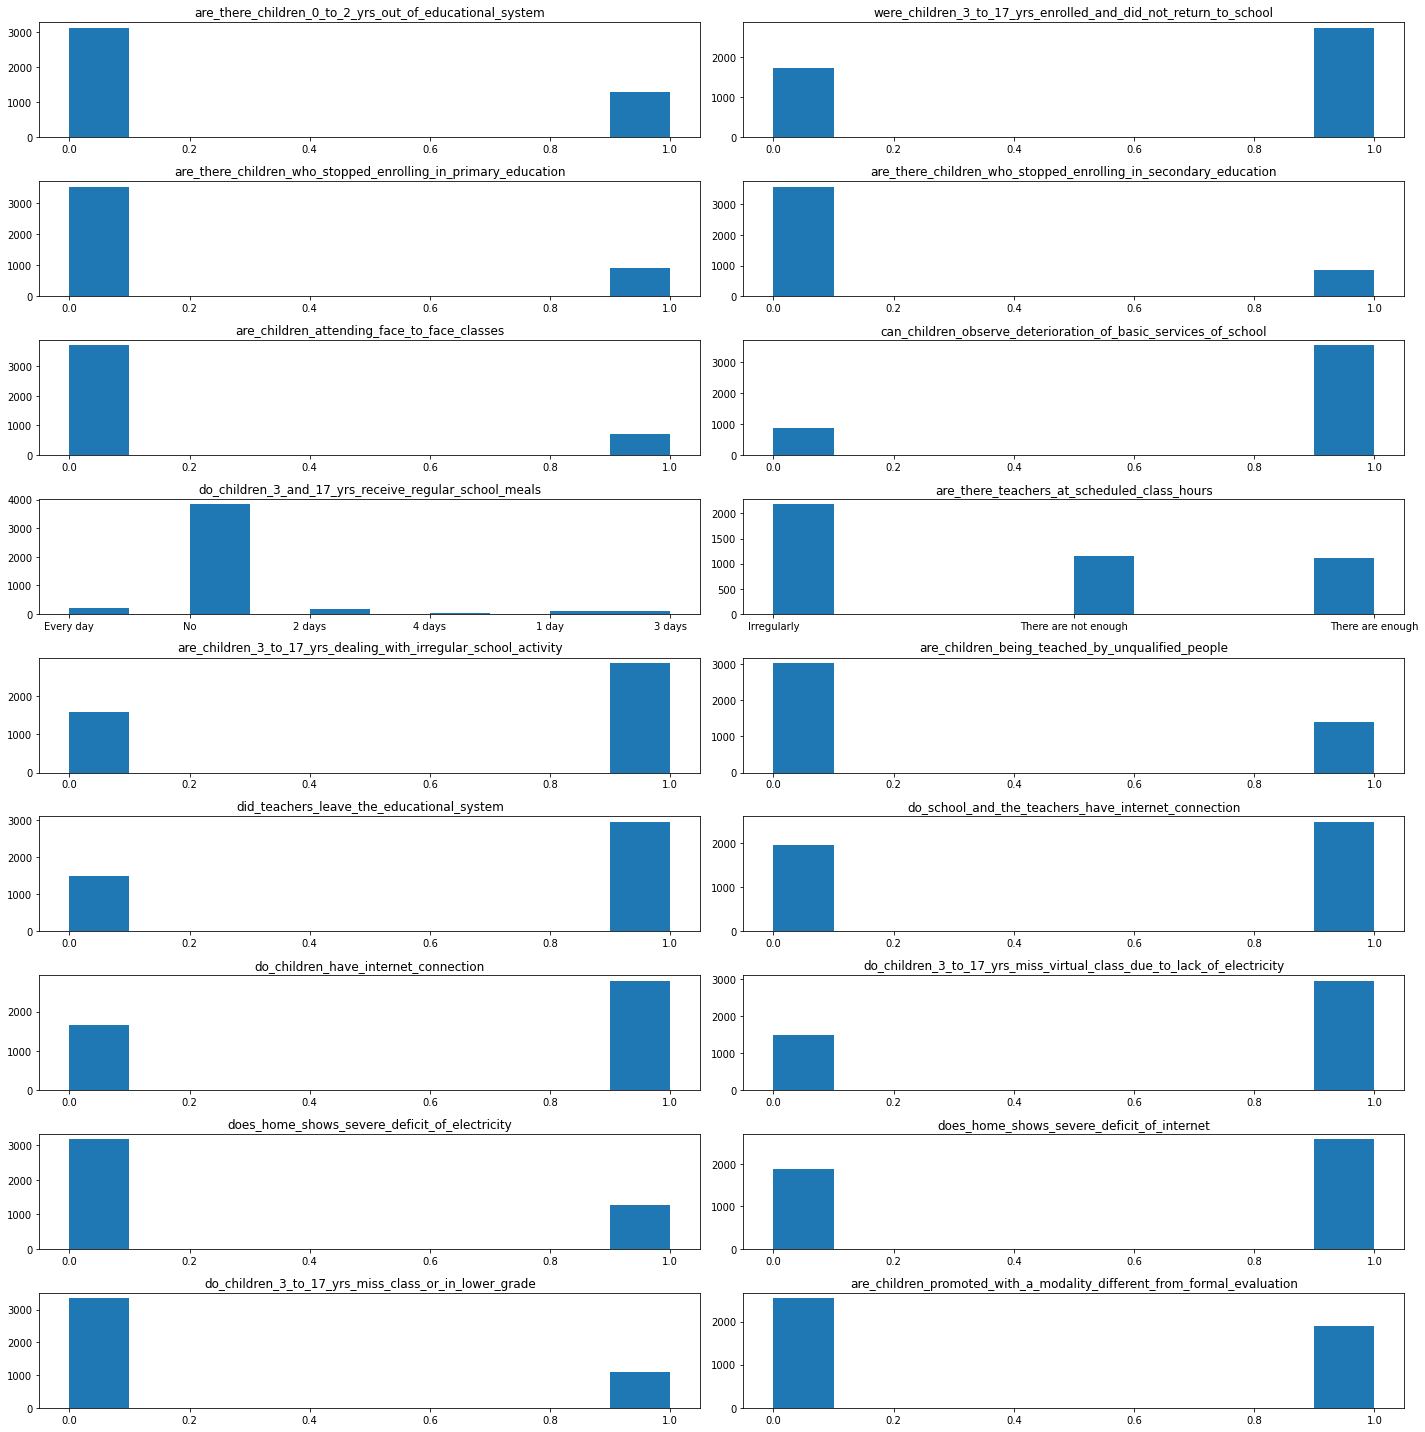

In [30]:
fig = plt.figure(figsize=(20,20))

for i in range(len(num_list)):
    
    plt.subplot((len(num_list)/2), 2, i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]])

plt.tight_layout()

##***Try to increase the features by 'get_dummies'***

In [31]:
df=df.drop(['submission_date'], axis=1)

In [32]:
df1=pd.get_dummies(df)

In [33]:
df1

,submission_id,are_there_children_0_to_2_yrs_out_of_educational_system,were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school,are_there_children_who_stopped_enrolling_in_primary_education,are_there_children_who_stopped_enrolling_in_secondary_education,are_children_attending_face_to_face_classes,can_children_observe_deterioration_of_basic_services_of_school,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation,gender_Female,gender_Male,gender_Non-Binary,gender_Not Available,gender_Prefer not to answer,age_16 to 25 years old,age_26 to 35 years old,age_36 to 45 years old,age_Not Available,age_Over 45 years old,age_Under 16,geography_City center or metropolitan area,geography_Not Available,geography_Rural,geography_Suburban/Peri-urban,"financial_situation_I can afford food and regular expenses, but nothing else","financial_situation_I can afford food, but nothing else","financial_situation_I can afford food, regular expenses, and clothes, but nothing else","financial_situation_I can comfortably afford food, clothes, and furniture, and I have savings","financial_situation_I can comfortably afford food, clothes, and furniture, but I don’t have savings",financial_situation_I cannot afford enough food for my family,financial_situation_Not Available,financial_situation_Prefer not to answer,...,"employment_status_I work full-time, either as an employee or self-employed","employment_status_I work part-time, either as an employee or self-employed",employment_status_None of the above,employment_status_Not Available,employment_status_Retired,employment_status_Student,employment_status_Unemployed,submission_state_Amazonas,submission_state_Anzoátegui,submission_state_Apure,submission_state_Aragua,submission_state_Barinas,submission_state_Bolívar,submission_state_Carabobo,submission_state_Cojedes,submission_state_Delta Amacuro,submission_state_Distrito Federal,submission_state_Falcón,submission_state_Guárico,submission_state_Lara,submission_state_Miranda,submission_state_Monagas,submission_state_Mérida,submission_state_Nueva Esparta,submission_state_Portuguesa,submission_state_Sucre,submission_state_Trujillo,submission_state_Táchira,submission_state_Vargas,submission_state_Yaracuy,submission_state_Zulia,do_children_3_and_17_yrs_receive_regular_school_meals_1 day,do_children_3_and_17_yrs_receive_regular_school_meals_2 days,do_children_3_and_17_yrs_receive_regular_school_meals_3 days,do_children_3_and_17_yrs_receive_regular_school_meals_4 days,do_children_3_and_17_yrs_receive_regular_school_meals_Every day,do_children_3_and_17_yrs_receive_regular_school_meals_No,are_there_teachers_at_scheduled_class_hours_Irregularly,are_there_teachers_at_scheduled_class_hours_There are enough,are_there_teachers_at_scheduled_class_hours_There are not enough
0,4.570530e+15,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,6.440170e+15,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,5.001170e+15,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,5.524930e+15,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,5.032520e+15,0,1,0,0,0,1,1,0,1,0,1,1

In [34]:
df1.columns.unique()

Index(['submission_id',
       'are_there_children_0_to_2_yrs_out_of_educational_system',
       'were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school',
       'are_there_children_who_stopped_enrolling_in_primary_education',
       'are_there_children_who_stopped_enrolling_in_secondary_education',
       'are_children_attending_face_to_face_classes',
       'can_children_observe_deterioration_of_basic_services_of_school',
       'are_children_3_to_17_yrs_dealing_with_irregular_school_activity',
       'are_children_being_teached_by_unqualified_people',
       'did_teachers_leave_the_educational_system',
       ...
       'submission_state_Zulia',
       'do_children_3_and_17_yrs_receive_regular_school_meals_1 day',
       'do_children_3_and_17_yrs_receive_regular_school_meals_2 days',
       'do_children_3_and_17_yrs_receive_regular_school_meals_3 days',
       'do_children_3_and_17_yrs_receive_regular_school_meals_4 days',
       'do_children_3_and_17_yrs_receive_regular_sc

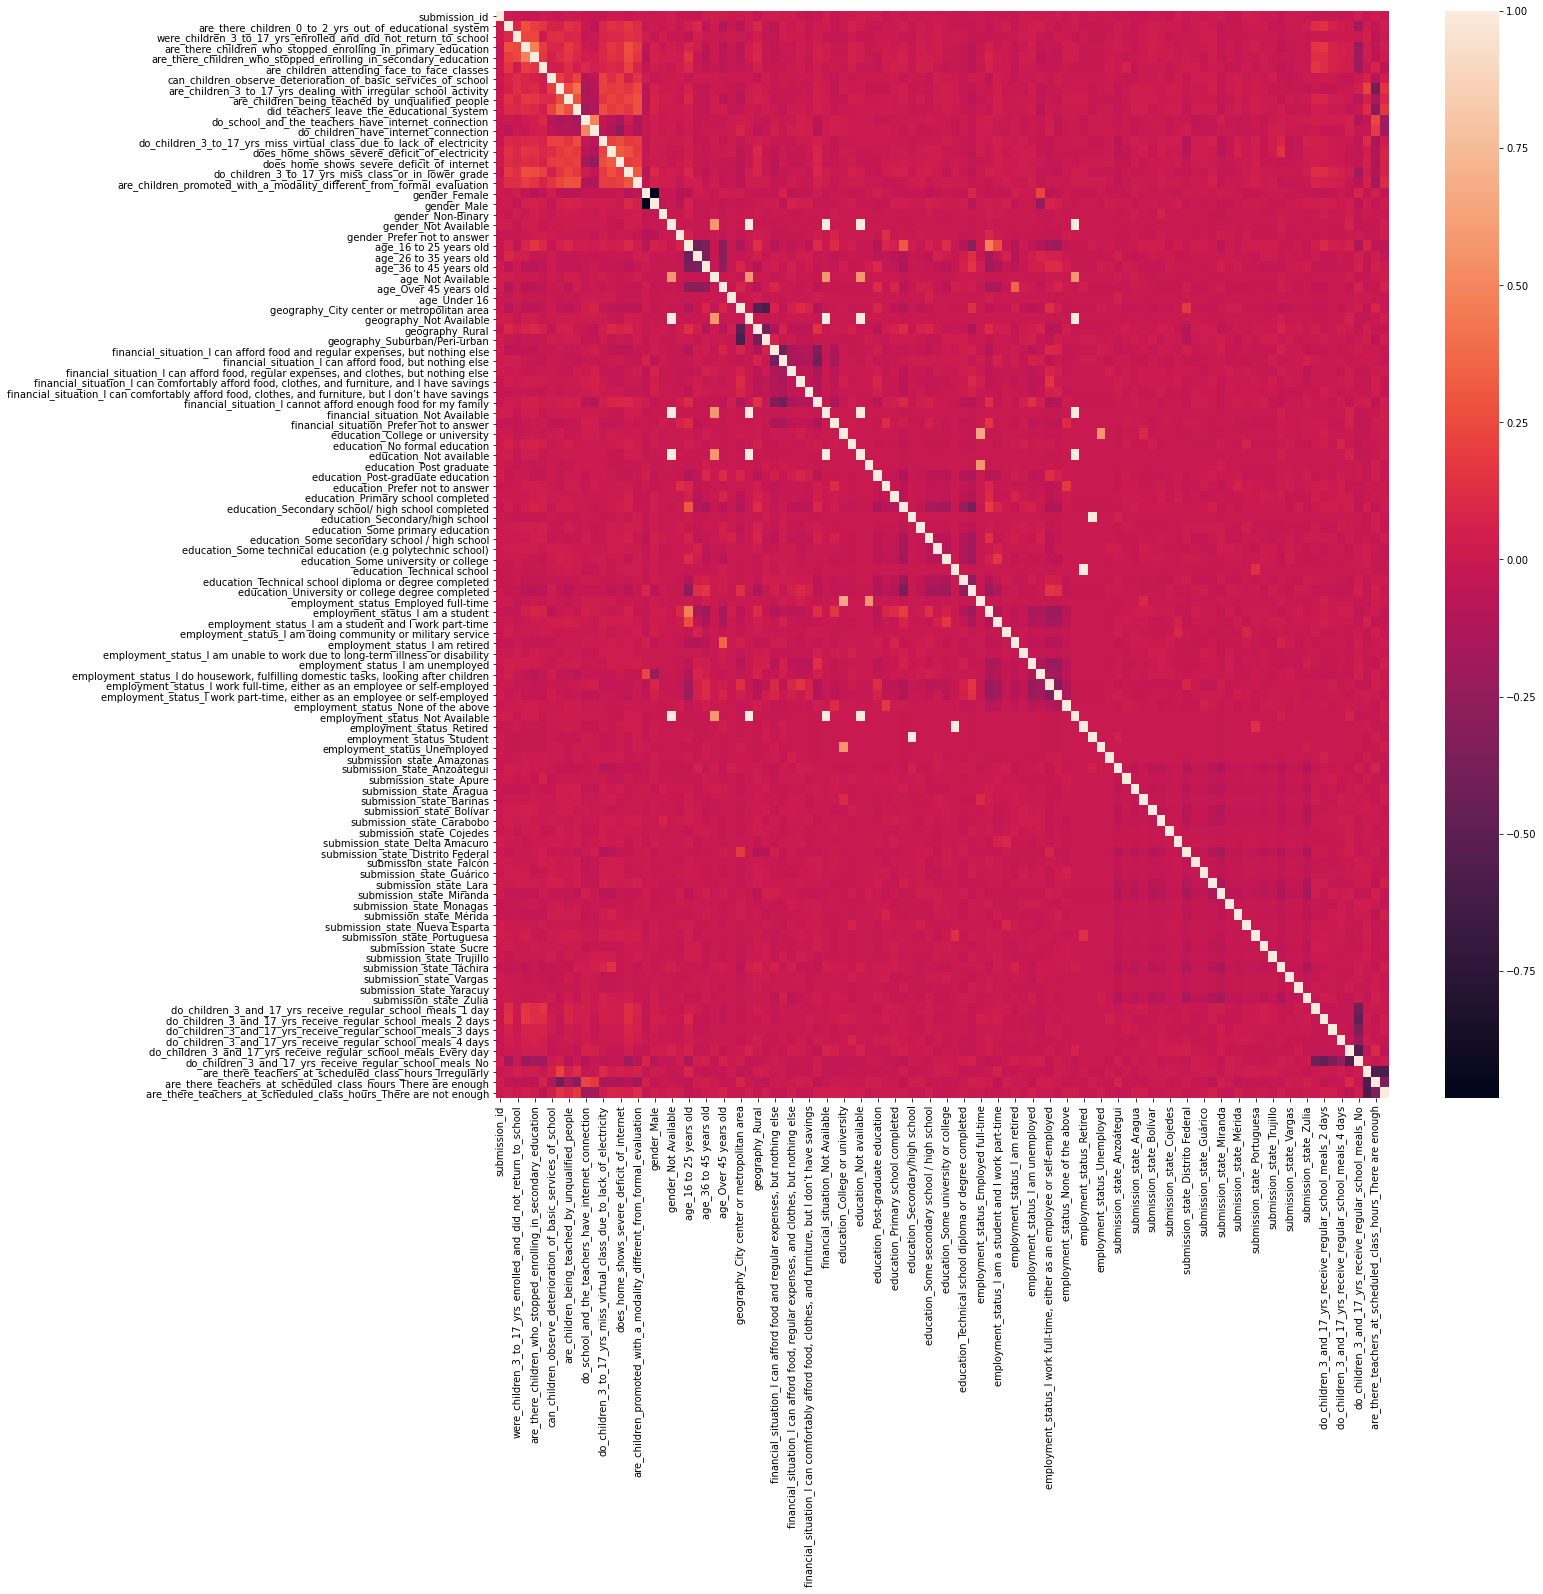

In [35]:
plt.figure(figsize=(20, 20))
sns.heatmap(df1.corr())

In [38]:
from sklearn.cluster import KMeans
clust_df1=KMeans(n_clusters=4).fit_predict(df1.iloc[:,1:])
clust_df1=pd.DataFrame(clust_df1,columns=['cluster'])

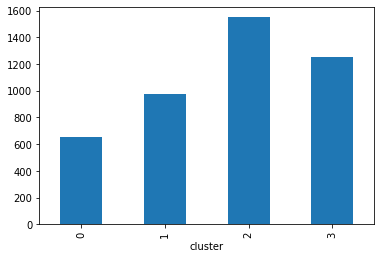

In [39]:
df1['cluster']=clust_df1['cluster']
df1.groupby('cluster')['submission_id'].count().plot.bar()

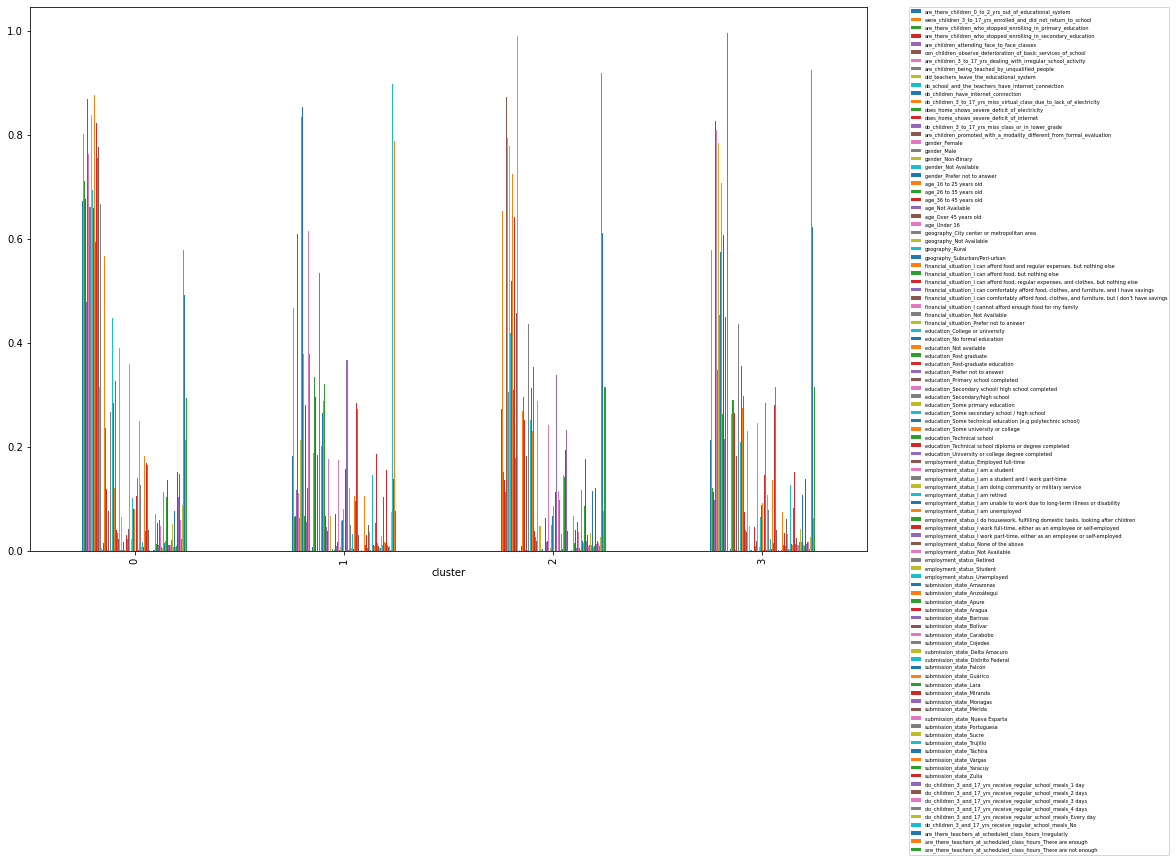

In [40]:
df1.groupby('cluster').mean().iloc[:,1:].plot.bar(figsize=(15,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=5)

In [41]:
from sklearn.decomposition import TruncatedSVD,PCA
pca=PCA(4)
pca_df1=pca.fit_transform(df1.iloc[:,1:])
pca_df1=pd.DataFrame(pca_df1,columns=['PC1','PC2','PC3','PC4'])
pca_df1['cluster']=df1['cluster']

In [42]:
pca_df1

,PC1,PC2,PC3,PC4,cluster
0,0.899804,-1.136626,-0.253271,-0.193814,1
1,-1.605672,-0.005440,0.323077,-0.095791,3
2,-0.018224,0.427837,-1.090793,1.173905,2
3,-1.405171,-0.754828,0.481825,0.481350,3
4,-0.511069,-0.162631,-0.991578,0.127334,2
...,...,...,...,...,...
4431,-0.386592,-0.230446,-0.607223,-0.188364,2
4432,-0.387235,-0.229699,-0.906092,-0.557000,2
4433,1.713325,1.283767,0.989853,0.165796,0
4434,-0.135379,0.028092,-0.776569,0.221313,2


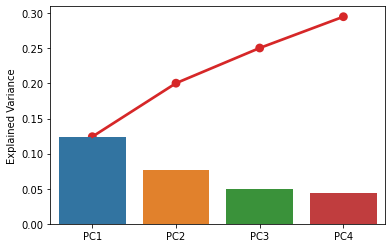

In [43]:
sns.barplot(x=['PC1','PC2','PC3','PC4'],y=pca.explained_variance_ratio_)
sns.pointplot(x=['PC1','PC2','PC3','PC4'],y=np.cumsum(pca.explained_variance_ratio_),lw=5,legend=True,label='Cumulative',color='tab:red')
plt.ylabel('Explained Variance')
plt.show()

In [44]:
df=df.drop('submission_state', axis=1)

In [45]:
df['gender']=df['gender'].map({'Female':1, 'Male':2, 'Prefer not to answer':0, 'Non-Binary':0,'Not Available':0})
df['age']=df['age'].map({'Over 45 years old':5, '26 to 35 years old':3, '36 to 45 years old':4,'16 to 25 years old':2, 'Under 16':1, 'Not Available':0})
df['geography']=df['geography'].map({'Suburban/Peri-urban':2, 'City center or metropolitan area':3, 'Rural':1,'Not Available':0})
df['financial_situation']=df['financial_situation'].map({'I can afford food and regular expenses, but nothing else':3,
       'I cannot afford enough food for my family':1,
       'I can comfortably afford food, clothes, and furniture, and I have savings':6,
       'I can afford food, but nothing else':2,
       'I can comfortably afford food, clothes, and furniture, but I don’t have savings':5,
       'I can afford food, regular expenses, and clothes, but nothing else':4,
       'Prefer not to answer':0, 'Not Available':0})
df['education']=df['education'].map({'University or college degree completed':4,
       'Technical school diploma or degree completed':5,
       'Some technical education (e.g polytechnic school)':3,
       'Some university or college':4,
       'Secondary school/ high school completed':2,
       'Primary school completed':1, 'Some primary education':1,
       'Some secondary school / high school':2, 'Post-graduate education':5,
       'Prefer not to answer':0, 'No formal education':0, 'Not available':0,
       'College or university':4, 'Post graduate':5, 'Technical school':3,
       'Secondary/high school':2})
df['employment_status']=df['employment_status'].map({'I am unemployed':0,
       'I work full-time, either as an employee or self-employed':6,
       'I do housework, fulfilling domestic tasks, looking after children':4,
       'I work part-time, either as an employee or self-employed':2,
       'I am retired':3, 'I am a student and I work part-time':2,
       'I am a student':1, 'None of the above':0,
       'I am doing community or military service':5,
       'I am unable to work due to long-term illness or disability':0,
       'Not Available':0, 'Employed full-time':6, 'Retired':3, 'Student':1,
       'Unemployed':0})
df['do_children_3_and_17_yrs_receive_regular_school_meals']=df['do_children_3_and_17_yrs_receive_regular_school_meals'].map({'Every day':5, 'No':0, '2 days':2, '4 days':4, '1 day':1, '3 days':3})
df['are_there_teachers_at_scheduled_class_hours']=df['are_there_teachers_at_scheduled_class_hours'].map({'Irregularly':0, 'There are not enough':1, 'There are enough':2})

In [46]:
df

,submission_id,gender,age,geography,financial_situation,education,employment_status,are_there_children_0_to_2_yrs_out_of_educational_system,were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school,are_there_children_who_stopped_enrolling_in_primary_education,are_there_children_who_stopped_enrolling_in_secondary_education,are_children_attending_face_to_face_classes,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
0,4.570530e+15,1,5,2,3,4,0,0,1,1,0,0,1,5,0,0,0,0,1,1,0,0,0,0,0
1,6.440170e+15,2,3,2,1,4,0,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0
2,5.001170e+15,1,3,3,6,4,6,1,1,1,1,0,1,0,1,1,1,1,0,1,0,1,0,0,1
3,5.524930e+15,2,4,2,2,4,6,0,0,0,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0
4,5.032520e+15,1,5,2,3,4,0,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,5.229260e+15,1,5,2,2,4,6,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,1
4432,6.520660e+15,1,5,1,2,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
4433,5.222700e+15,2,2,2,4,5,2,1,1,0,1,0,1,3,0,1,0,1,1,1,1,0,1,1,1
4434,6.150640e+15,1,5,2,3,4,6,1,1,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0


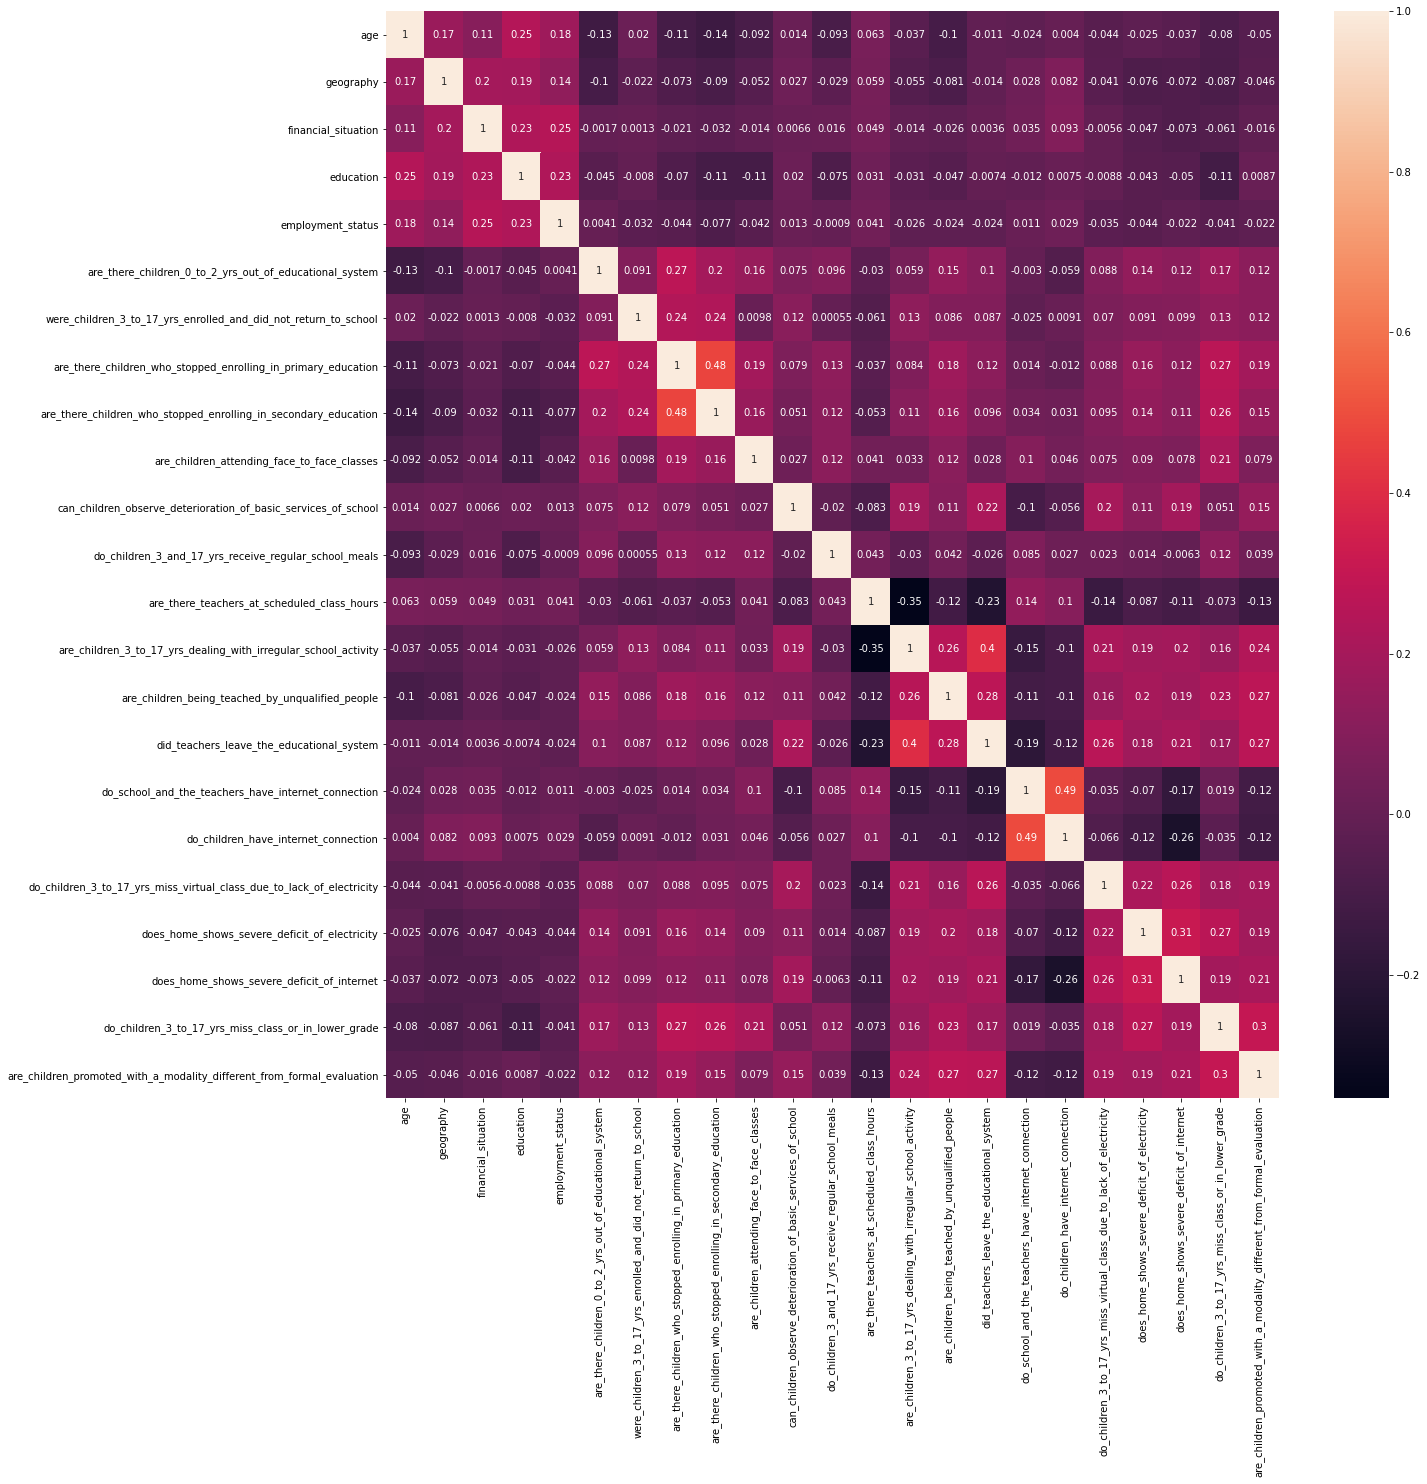

In [47]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.iloc[:,2:].corr(),annot=True)

In [52]:
from sklearn.cluster import KMeans
clust_df=KMeans(n_clusters=4).fit_predict(df.iloc[:,2:])
clust_df=pd.DataFrame(clust_df,columns=['cluster'])

In [53]:
df['cluster']=clust_df['cluster']

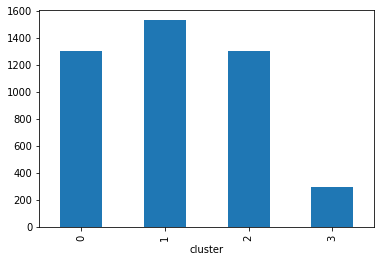

In [54]:
df.groupby('cluster')['submission_id'].count().plot.bar()

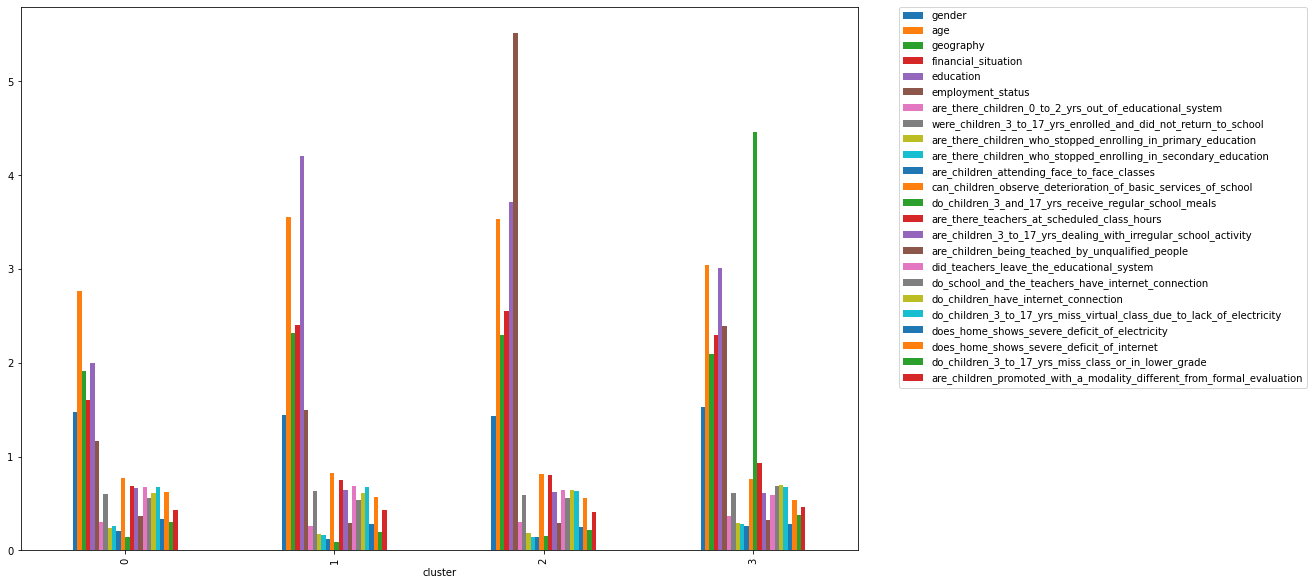

In [55]:
df.groupby('cluster').mean().iloc[:,1:].plot.bar(figsize=(15,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

In [56]:
from sklearn.decomposition import TruncatedSVD,PCA
pca=PCA(2)
pca_df=pca.fit_transform(df.iloc[:,2:])
pca_df=pd.DataFrame(pca_df,columns=['PC1','PC2'])
pca_df['gender'] = df.gender
pca_df['age'] = df.age
pca_df['geography'] = df.geography
pca_df['financial_situation']=df.financial_situation
pca_df['education']=df.education
pca_df['employment_status']=df.employment_status
pca_df['cluster']=df.cluster

In [57]:
pca_df

,PC1,PC2,gender,age,geography,financial_situation,education,employment_status,cluster
0,-1.118407,-0.515429,1,5,2,3,4,0,3
1,-2.578018,-0.718186,2,3,2,1,4,0,1
2,4.236842,-1.367798,1,3,3,6,4,6,2
3,3.457654,0.367969,2,4,2,2,4,6,2
4,-1.850038,-2.378015,1,5,2,3,4,0,1
...,...,...,...,...,...,...,...,...,...
4431,3.519564,0.195504,1,5,2,2,4,6,2
4432,-1.323525,0.734795,1,5,1,2,1,2,0
4433,0.603296,-0.589858,2,2,2,4,5,2,3
4434,3.724901,-0.259796,1,5,2,3,4,6,2


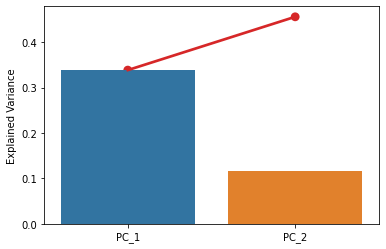

In [58]:
sns.barplot(x=['PC_1','PC_2'],y=pca.explained_variance_ratio_)
sns.pointplot(x=['PC_1','PC_2'],y=np.cumsum(pca.explained_variance_ratio_),lw=5,legend=True,label='Cumulative',color='tab:red')
plt.ylabel('Explained Variance')
plt.show()

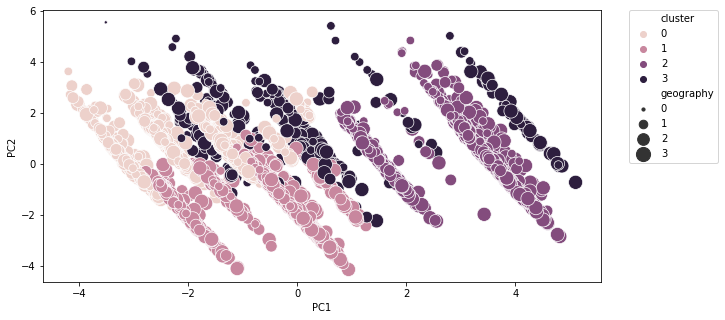

In [59]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],size=pca_df['geography'],hue=pca_df['cluster'],sizes=(10, 200))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

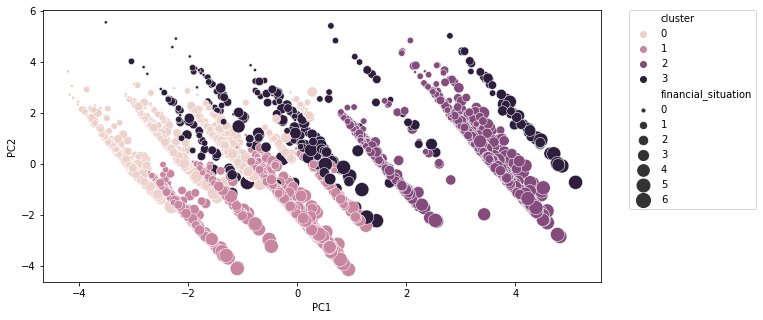

In [60]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],size=pca_df['financial_situation'],hue=pca_df['cluster'],sizes=(10, 200))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

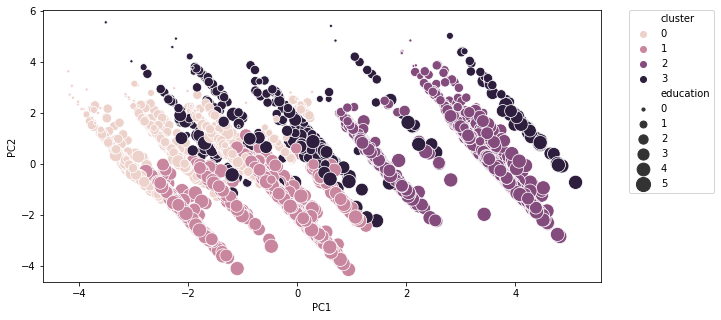

In [61]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],size=pca_df['education'],hue=pca_df['cluster'],sizes=(10, 200))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

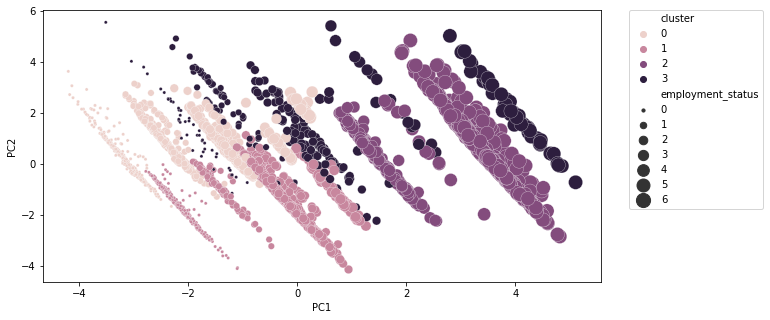

In [62]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],size=pca_df['employment_status'],hue=pca_df['cluster'],sizes=(10, 200))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

In [66]:
is_cluster_0 = pca_df['cluster']==0
cluster_0 = pca_df[is_cluster_0]
cluster_0

,PC1,PC2,gender,age,geography,financial_situation,education,employment_status,cluster
10,-3.241762,0.348640,0,2,2,1,3,0,0
18,-1.301339,0.567567,1,3,2,2,2,2,0
19,-2.130143,0.286719,1,2,1,4,1,1,0
22,-2.861809,1.949865,2,2,1,1,1,1,0
24,-3.482896,0.916271,1,2,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...
4415,-2.626300,1.416513,2,2,1,2,1,1,0
4420,-1.185792,0.396903,1,2,2,3,2,2,0
4425,-3.597263,1.349552,2,2,2,1,1,0,0
4429,-3.317829,0.575717,2,3,2,1,2,0,0


In [67]:
is_cluster_1 = pca_df['cluster']==1
cluster_1 = pca_df[is_cluster_1]
cluster_1

,PC1,PC2,gender,age,geography,financial_situation,education,employment_status,cluster
1,-2.578018,-0.718186,2,3,2,1,4,0,1
4,-1.850038,-2.378015,1,5,2,3,4,0,1
7,-0.305163,-1.325782,1,5,2,1,5,2,1
8,0.262340,-0.141446,1,5,1,1,4,3,1
9,-0.600682,0.386315,2,3,3,1,4,2,1
...,...,...,...,...,...,...,...,...,...
4418,0.110994,-2.125811,1,4,3,4,4,2,1
4421,-0.471633,-0.611388,2,5,3,3,2,2,1
4424,-1.435332,-0.871752,1,2,1,3,4,1,1
4426,-2.509131,-0.739977,1,2,1,2,4,0,1


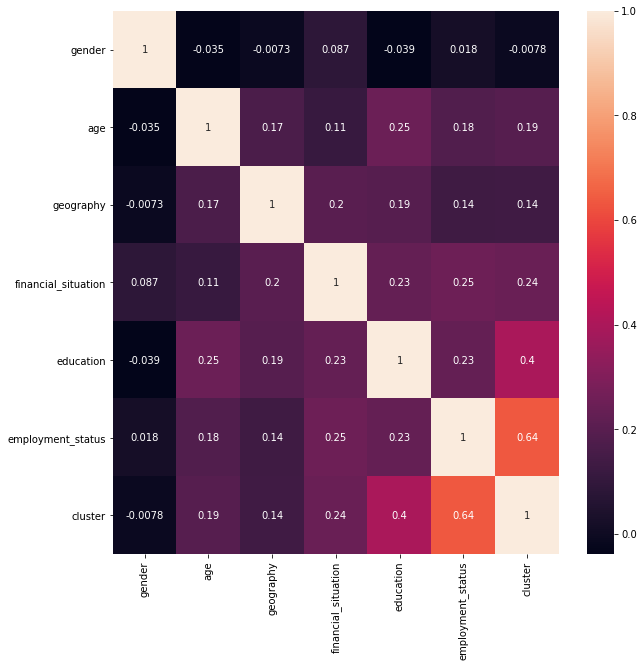

In [69]:
plt.figure(figsize=(10, 10))
sns.heatmap(pca_df.iloc[:,2:].corr(),annot=True)

In [7]:
df

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,are_there_children_0_to_2_yrs_out_of_educational_system,were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school,are_there_children_who_stopped_enrolling_in_primary_education,are_there_children_who_stopped_enrolling_in_secondary_education,are_children_attending_face_to_face_classes,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
0,4.570000e+15,3/17/2021,Female,Over 45 years old,Suburban/Peri-urban,4,1,1,Miranda,0,1,1,0,0,1,Every day,Irregularly,0,0,0,1,1,0,0,0,0,0
1,6.440000e+15,3/29/2021,Male,26 to 35 years old,Suburban/Peri-urban,6,1,1,Miranda,0,1,0,0,0,1,No,Irregularly,1,0,1,0,1,1,0,0,0,0
2,5.000000e+15,3/18/2021,Female,26 to 35 years old,City center or metropolitan area,1,1,1,Miranda,1,1,1,1,0,1,No,There are not enough,1,1,1,0,1,0,1,0,0,1
3,5.520000e+15,3/24/2021,Male,36 to 45 years old,Suburban/Peri-urban,5,1,1,Miranda,0,0,0,0,0,1,No,There are enough,1,1,1,0,1,0,0,0,0,0
4,5.030000e+15,3/18/2021,Female,Over 45 years old,Suburban/Peri-urban,4,1,1,Miranda,0,1,0,0,0,1,No,There are not enough,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,5.230000e+15,3/22/2021,Female,Over 45 years old,Suburban/Peri-urban,5,1,1,Anzoátegui,0,0,0,0,0,0,No,Irregularly,1,1,1,1,1,0,0,1,0,1
4432,6.520000e+15,3/19/2021,Female,Over 45 years old,Rural,5,3,2,Anzoátegui,0,0,0,0,0,1,No,There are not enough,0,0,1,0,0,1,0,1,0,0
4433,5.220000e+15,3/25/2021,Male,16 to 25 years old,Suburban/Peri-urban,3,1,3,Anzoátegui,1,1,0,1,0,1,3 days,Irregularly,1,0,1,1,1,1,0,1,1,1
4434,6.150000e+15,3/13/2021,Female,Over 45 years old,Suburban/Peri-urban,4,1,1,Anzoátegui,1,1,1,1,0,1,No,Irregularly,0,0,1,0,1,1,0,1,0,0


In [8]:
newFeatures=df.drop(['age','submission_date','submission_id','gender','geography','submission_state','do_children_3_and_17_yrs_receive_regular_school_meals','are_there_teachers_at_scheduled_class_hours'],axis=1)

In [9]:
newFeatures

,financial_situation,education,employment_status,are_there_children_0_to_2_yrs_out_of_educational_system,were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school,are_there_children_who_stopped_enrolling_in_primary_education,are_there_children_who_stopped_enrolling_in_secondary_education,are_children_attending_face_to_face_classes,can_children_observe_deterioration_of_basic_services_of_school,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
0,4,1,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,6,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0
2,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,1
3,5,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0
4,4,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,5,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,1
4432,5,3,2,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4433,3,1,3,1,1,0,1,0,1,1,0,1,1,1,1,0,1,1,1
4434,4,1,1,1,1,1,1,0,1,0,0,1,0,1,1,0,1,0,0


In [10]:
scaler = preprocessing.MinMaxScaler()
new_features_normal = scaler.fit_transform(newFeatures)

In [11]:
new_features_normal

array([[0.66666667, 0.33333333, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.33333333, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.5       , 0.33333333, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.66666667, 0.33333333, 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.66666667, 0.33333333, 0.66666667, ..., 1.        , 0.        ,
        1.        ]])

In [12]:
pd.DataFrame(new_features_normal).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000
mean,0.735873,0.613766,0.544259,0.294860,0.613165,0.206492,0.194319,0.163661,0.800496,0.643147,0.316501,0.664337,0.560415,0.628494,0.665464,0.284491,0.579125,0.246393,0.427187
std,0.266473,0.294944,0.298344,0.456031,0.487080,0.404834,0.395720,0.370009,0.399673,0.479125,0.465163,0.472275,0.496393,0.483262,0.471881,0.451222,0.493755,0.430959,0.494726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.833333,0.666667,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.666667,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(new_features_normal)
    kmeanModel.fit(new_features_normal)
    inertia.append(kmeanModel.inertia_)

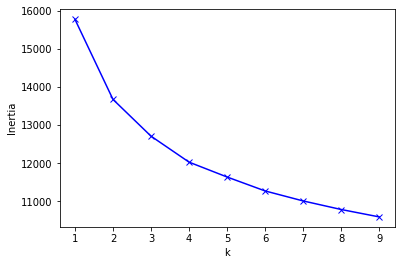

In [14]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4).fit(new_features_normal)

In [16]:
labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledFeatures = pd.concat((newFeatures,labels),axis=1)
labeledFeatures = labeledFeatures.rename({0:'labels'},axis=1)

In [17]:
labeledFeatures

,financial_situation,education,employment_status,are_there_children_0_to_2_yrs_out_of_educational_system,were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school,are_there_children_who_stopped_enrolling_in_primary_education,are_there_children_who_stopped_enrolling_in_secondary_education,are_children_attending_face_to_face_classes,can_children_observe_deterioration_of_basic_services_of_school,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation,labels
0,4,1,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,2
1,6,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0
2,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,1,3
3,5,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0
4,4,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,5,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,1,0
4432,5,3,2,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
4433,3,1,3,1,1,0,1,0,1,1,0,1,1,1,1,0,1,1,1,3
4434,4,1,1,1,1,1,1,0,1,0,0,1,0,1,1,0,1,0,0,3


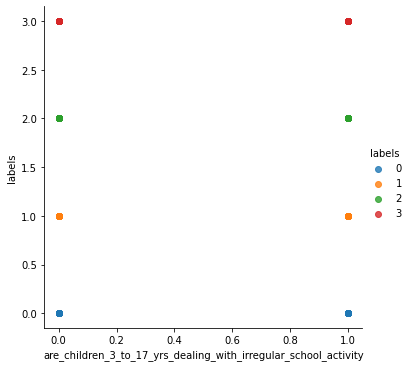

In [18]:
sns.lmplot(x='are_children_3_to_17_yrs_dealing_with_irregular_school_activity',y='labels', data=labeledFeatures,hue='labels',fit_reg=False)

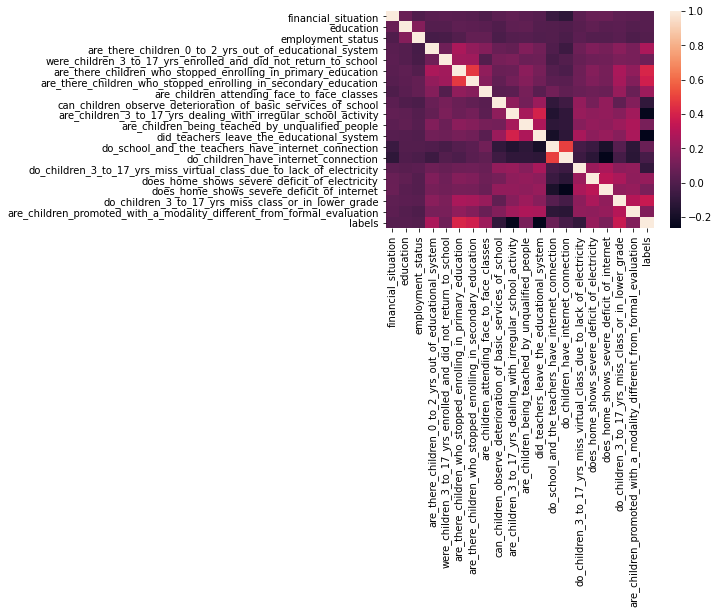

In [19]:
# generating correlation heatmap
sns.heatmap(labeledFeatures.corr(), annot = False)
  
# posting correlation heatmap to output console 
plt.show()